# Minimizar falsos positivos en compras presenciales

### Manuel Rodas 21509

In [56]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


df = pd.read_csv("dataset_feature_engineering.csv")


print("Shape:", df.shape)
df.head()


Shape: (1852394, 35)


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [57]:

df.isnull().sum()


df.describe()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,count_month_shopping_net,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,...,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,...,4.567241e+00,7.610956e+01,7.152067e+00,2.967456e+00,1.280612e+01,2.019501e+03,5.298079e+00,3.150459e+00,1.389109e+00,1.655442e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,...,4.575502e+00,2.909273e+01,3.424954e+00,2.197983e+00,6.815753e+00,4.999996e-01,3.094345e+00,1.865369e+00,6.722559e-01,9.025901e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,...,0.000000e+00,2.227351e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,...,1.000000e+00,5.534198e+01,4.000000e+00,1.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,...,3.000000e+00,7.824823e+01,7.000000e+00,3.000000e+00,1.400000e+01,2.020000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,...,7.000000e+00,9.847204e+01,1.000000e+01,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,...,4.800000e+01,1.518682e+02,1.200000e+01,6.000000e+00,2.300000e+01,2.020000e+03,2.800000e+01,1.700000e+01,9.000000e+00,9.000000e+00


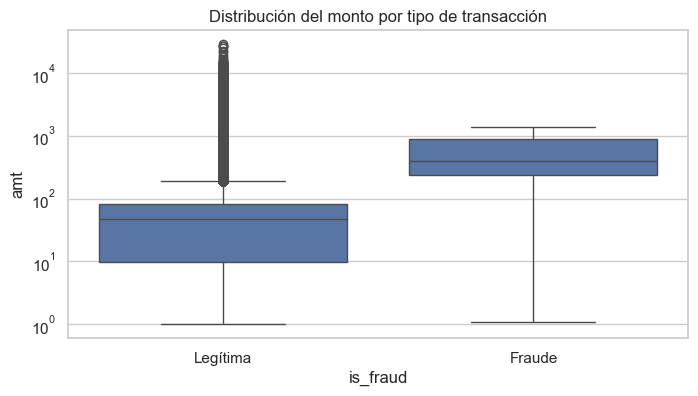

In [58]:

plt.figure(figsize=(8,4))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')
plt.title('Distribución del monto por tipo de transacción')
plt.xticks([0, 1], ['Legítima', 'Fraude'])
plt.show()


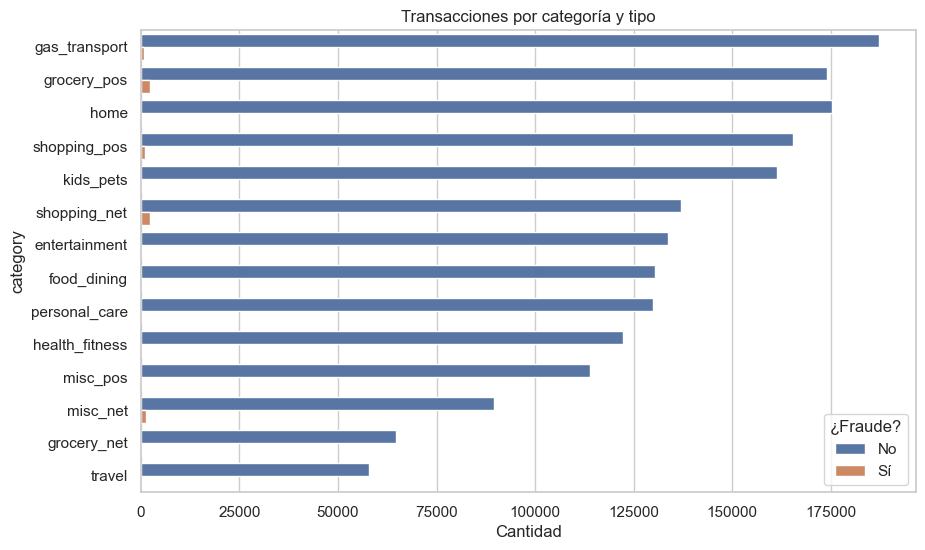

In [59]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='category', hue='is_fraud', order=df['category'].value_counts().index)
plt.title("Transacciones por categoría y tipo")
plt.xlabel("Cantidad")
plt.legend(title="¿Fraude?", labels=["No", "Sí"])
plt.show()


Porcentaje de fraude en compras POS: 0.79%


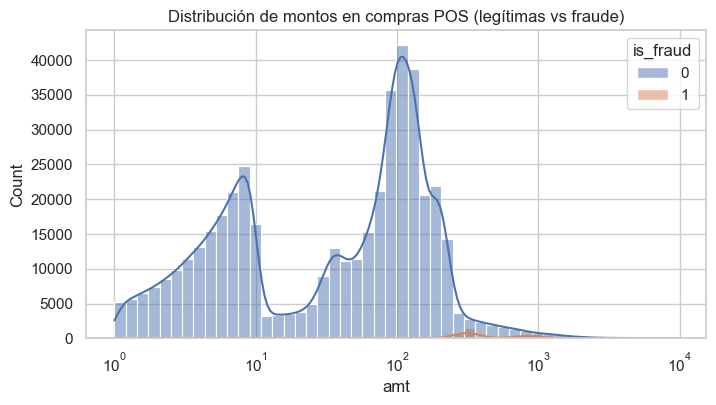

In [60]:

df_pos = df[df['category'].str.contains('pos')]


fraud_pos = df_pos['is_fraud'].mean()
print(f"Porcentaje de fraude en compras POS: {fraud_pos:.2%}")


plt.figure(figsize=(8,4))
sns.histplot(data=df_pos, x='amt', hue='is_fraud', bins=50, kde=True, log_scale=True)
plt.title("Distribución de montos en compras POS (legítimas vs fraude)")
plt.show()


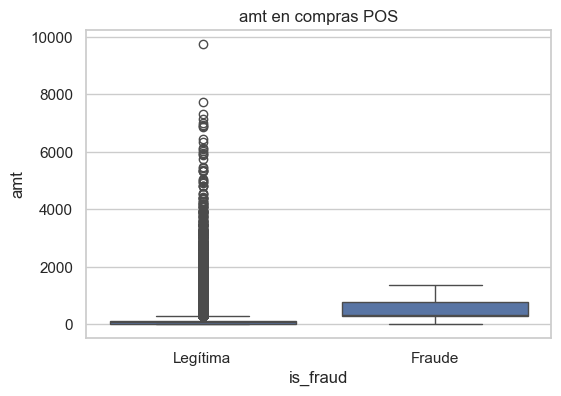

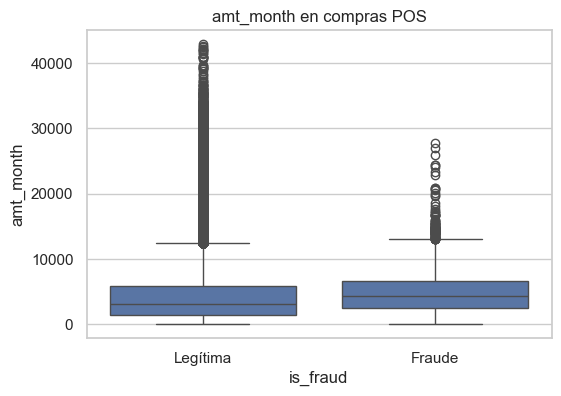

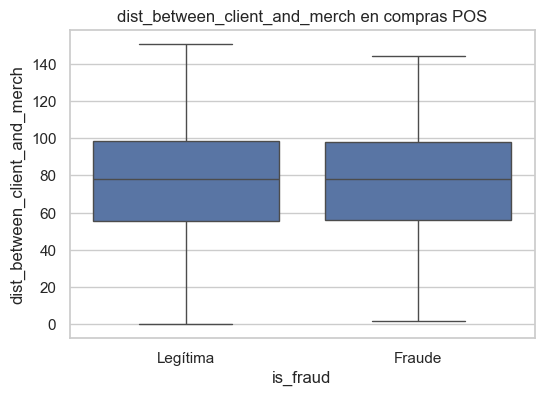

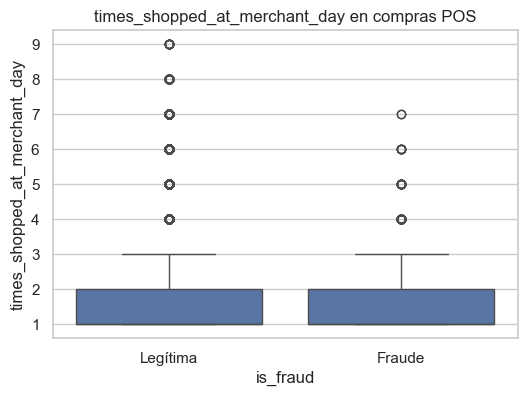

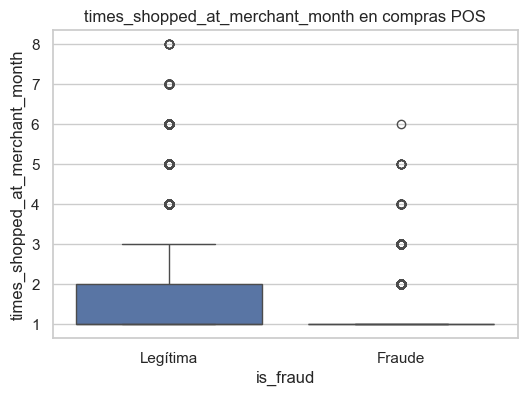

In [61]:

features_behavior = [
    'amt', 'amt_month', 'dist_between_client_and_merch',
    'times_shopped_at_merchant_day',
    'times_shopped_at_merchant_month'
]


for feature in features_behavior:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_pos, x='is_fraud', y=feature)
    plt.title(f"{feature} en compras POS")
    plt.xticks([0, 1], ['Legítima', 'Fraude'])
    plt.show()


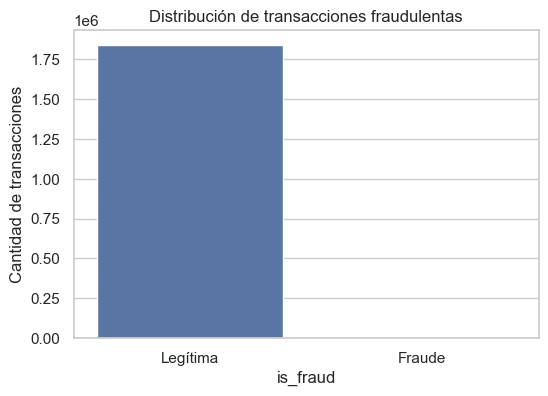

Porcentaje de fraude general: 0.52%


In [62]:

fraud_counts = df['is_fraud'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xticks([0, 1], ['Legítima', 'Fraude'])
plt.ylabel("Cantidad de transacciones")
plt.title("Distribución de transacciones fraudulentas")
plt.show()


fraud_rate = df['is_fraud'].mean()
print(f"Porcentaje de fraude general: {fraud_rate:.2%}")


In [63]:
# Número de veces previas que el cliente ha comprado en ese comercio
df['has_shopped_here_before'] = df.groupby(['cc_num', 'merchant'])['trans_num'].cumcount()


In [64]:
# Ordenar por cliente y tiempo
df.sort_values(['cc_num', 'unix_time'], inplace=True)

# Calcular tiempo desde la última transacción
df['prev_time'] = df.groupby('cc_num')['unix_time'].shift(1)
df['seconds_since_last'] = df['unix_time'] - df['prev_time']
df['seconds_since_last'].fillna(df['seconds_since_last'].median(), inplace=True)


/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_66667/1629303005.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seconds_since_last'].fillna(df['seconds_since_last'].median(), inplace=True)


In [65]:
# Flag de compra nocturna
df['is_night'] = df['hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)


In [66]:
# Normalización geográfica (distancia sobre población local)
df['dist_pop_ratio'] = df['dist_between_client_and_merch'] / (df['city_pop'] + 1)


In [67]:

selected_features = [
    'amt', 'amt_month', 'amt_year',
    'dist_between_client_and_merch',
    'dist_pop_ratio',
    'times_shopped_at_merchant_day',
    'times_shopped_at_merchant_month',
    'times_shopped_at_merchant_year',
    'has_shopped_here_before',
    'seconds_since_last',
    'is_night'
]

X = df[selected_features]
y = df['is_fraud']


X.isnull().sum()


amt                                0
amt_month                          0
amt_year                           0
dist_between_client_and_merch      0
dist_pop_ratio                     0
times_shopped_at_merchant_day      0
times_shopped_at_merchant_month    0
times_shopped_at_merchant_year     0
has_shopped_here_before            0
seconds_since_last                 0
is_night                           0
dtype: int64

In [68]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [70]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)


/Users/manuelrodasgordillo/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:26:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [71]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("F1 Score:", f1_score(y_test, y_pred))


AUC: 0.9832570895551082
F1 Score: 0.5324459234608985


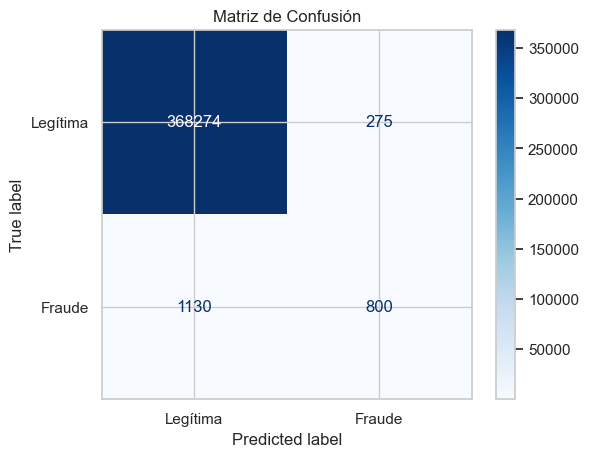

In [72]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Legítima", "Fraude"]).plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_66667/3761202767.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fp_pos = df_test_pos[(y_test == 0) & (y_pred == 1)]


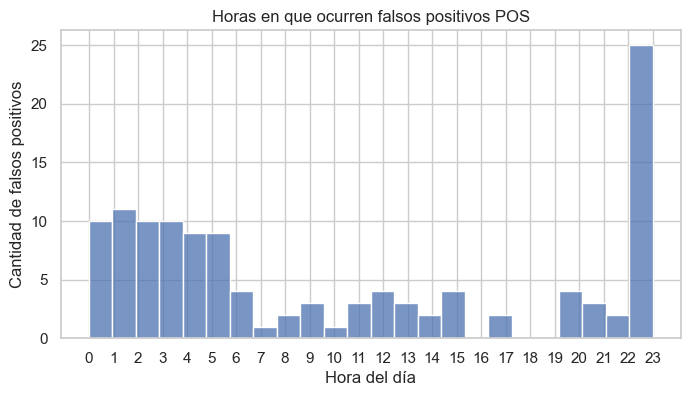

In [73]:
# Asegurarse de tener los mismos índices que X_test en el df original
df_test = df.loc[X_test.index]  # df debe ser el DataFrame original cargado

# Filtrar solo transacciones POS del conjunto de prueba
df_test_pos = df_test[df_test['category'].str.contains('pos', na=False)]

# Falsos positivos: transacciones legítimas clasificadas como fraude
fp_pos = df_test_pos[(y_test == 0) & (y_pred == 1)]

# Visualización
plt.figure(figsize=(8, 4))
sns.histplot(fp_pos['hour'], bins=24)
plt.title("Horas en que ocurren falsos positivos POS")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de falsos positivos")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


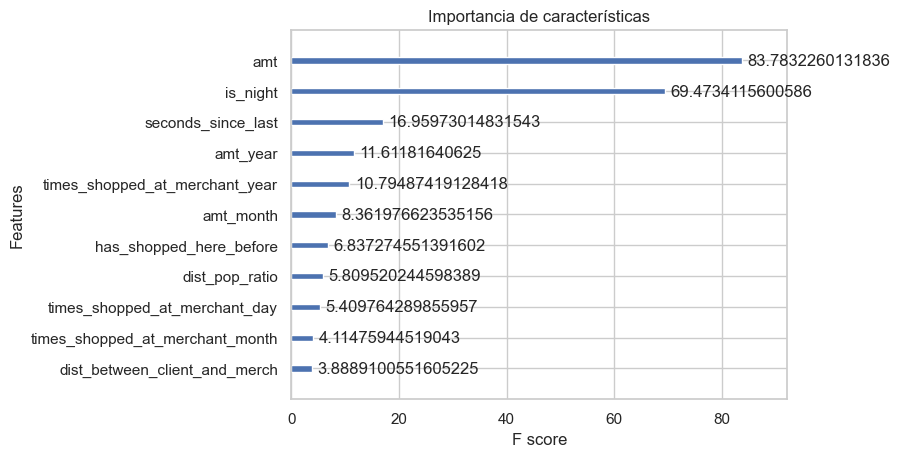

In [74]:
xgb.plot_importance(model, importance_type='gain')
plt.title("Importancia de características")
plt.show()


### Entrenamiento del modelo base con LightGBM

In [75]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [76]:
# Aquí solo eliminamos columnas no útiles
drop_cols = [
    'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip',
    'job', 'dob', 'trans_num', 'unix_time'
]
df = df.drop(columns=drop_cols)

In [77]:
# Codificación de columnas categóricas
categorical_cols = ['category', 'gender']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Definir X e y
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']


In [78]:
# División train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Dataset para LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)

# Parámetros del modelo base
params = {
    'objective': 'binary',
    'metric': ['auc', 'binary_logloss'],
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}


In [79]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

model = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1,
    n_estimators=500
)

# Entrenamiento con early stopping usando callbacks
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[
        early_stopping(stopping_rounds=30),
        log_evaluation(period=50)
    ]
)

# Predicciones
y_pred_prob = model.predict_proba(X_val)[:, 1]
y_pred = model.predict(X_val)


Training until validation scores don't improve for 30 rounds
[50]	valid_0's binary_logloss: 0.00672952
[100]	valid_0's binary_logloss: 0.00557248
[150]	valid_0's binary_logloss: 0.00622064
Early stopping, best iteration is:
[131]	valid_0's binary_logloss: 0.00517678


In [80]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

print("ROC AUC:", roc_auc_score(y_val, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


ROC AUC: 0.9953715802190068

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.91      0.78      0.84      1930

    accuracy                           1.00    370479
   macro avg       0.95      0.89      0.92    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368393    156]
 [   434   1496]]


/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_66667/2149079171.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance.head(20), x='Importance', y='Feature', palette='viridis')


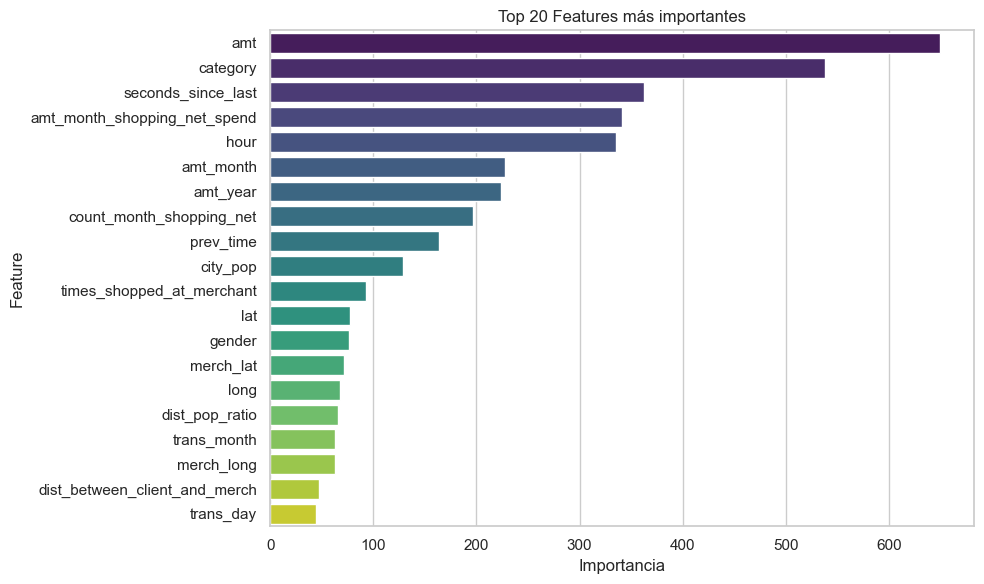

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener importancias
importances = model.feature_importances_
feature_names = X_train.columns

# Crear DataFrame ordenado
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Features más importantes")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


| Métrica                     | Valor                          | Interpretación                                                   |
| --------------------------- | ------------------------------ | ---------------------------------------------------------------- |
| **TP (fraudes detectados)** | 1,496                          | Detectados correctamente como fraude.                            |
| **FP (falsos positivos)**   | 156                            | Transacciones legítimas marcadas como fraude.                    |
| **Ratio (TP + FP) / TP**    | (1496 + 156) / 1496 ≈ **1.10** | Es decir, **por cada fraude real, hay \~0.10 falsos positivos**. |
| **Recall (class 1)**        | 0.78                           | Se detecta el 78% del fraude.                                    |
| **Precision (class 1)**     | 0.91                           | 9% de las alertas son falsas.                                    |
| **ROC AUC**                 | 0.995                          | El modelo separa bien ambas clases.                              |


#### Primera funcion

In [82]:
def feval_fp_ratio_sklearn(y_true, y_pred):
    y_pred_labels = (y_pred > 0.5).astype(int)

    tp = ((y_pred_labels == 1) & (y_true == 1)).sum()
    fp = ((y_pred_labels == 1) & (y_true == 0)).sum()

    if tp == 0:
        ratio = float('inf')
    else:
        ratio = (tp + fp) / tp

    return 'fp_ratio', ratio, False  # False porque queremos minimizarla


In [83]:
model_fp_ratio = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1,
    n_estimators=500
)

model_fp_ratio.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=feval_fp_ratio_sklearn,
    callbacks=[
        early_stopping(stopping_rounds=30),
        log_evaluation(period=50)
    ]
)


Training until validation scores don't improve for 30 rounds
[50]	valid_0's binary_logloss: 0.00672952	valid_0's fp_ratio: 1.11647
[100]	valid_0's binary_logloss: 0.00557248	valid_0's fp_ratio: 1.11885
Early stopping, best iteration is:
[88]	valid_0's binary_logloss: 0.00563346	valid_0's fp_ratio: 1.10736


LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.9,
               learning_rate=0.05, n_estimators=500, objective='binary',
               verbose=-1)

🔹 Modelo fp_ratio
ROC AUC: 0.9960411785430997

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.90      0.75      0.82      1930

    accuracy                           1.00    370479
   macro avg       0.95      0.88      0.91    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368393    156]
 [   477   1453]]


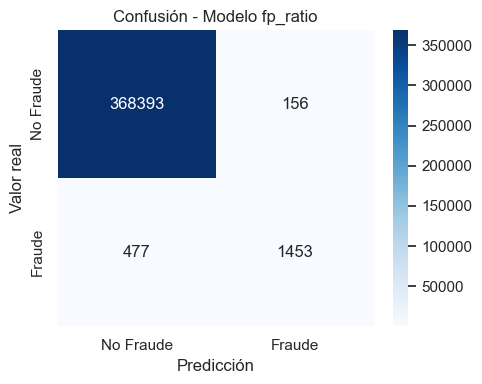

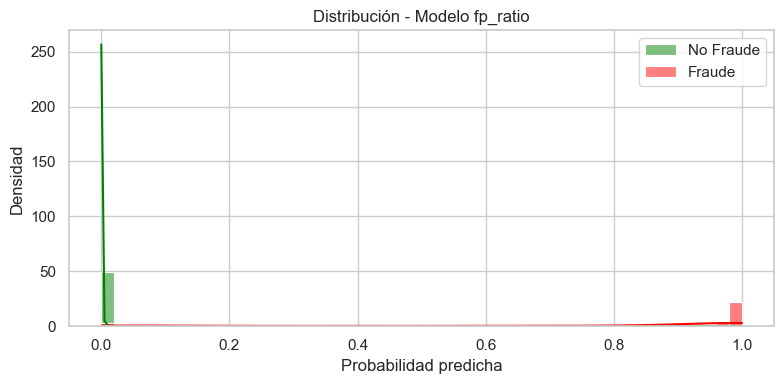

/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_66667/3054710702.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


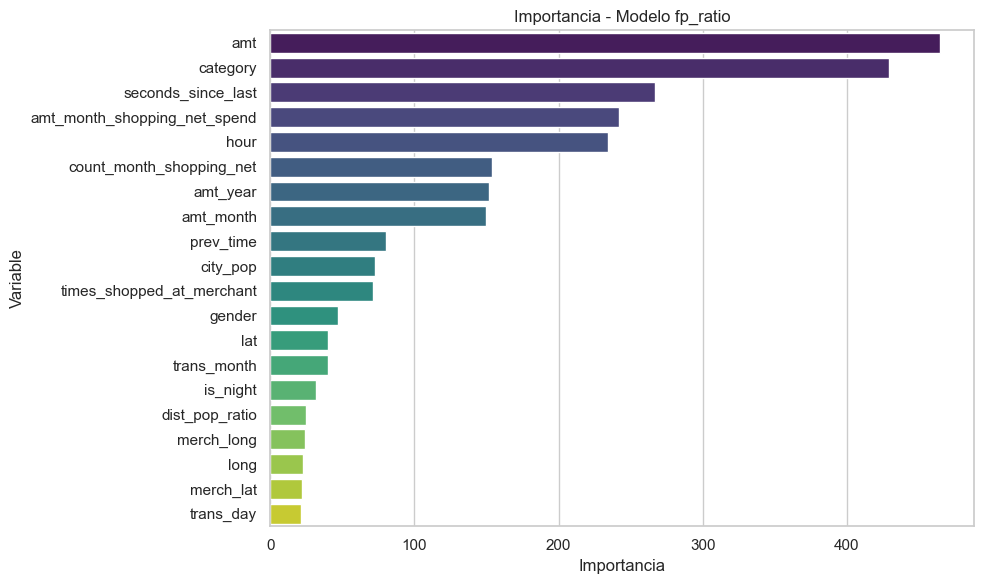

In [101]:
# Predicciones
y_pred_prob_fp = model_fp_ratio.predict_proba(X_val)[:, 1]
y_pred_fp = model_fp_ratio.predict(X_val)

# Métricas
print("🔹 Modelo fp_ratio")
print("ROC AUC:", roc_auc_score(y_val, y_pred_prob_fp))
print("\nClassification Report:\n", classification_report(y_val, y_pred_fp))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_fp))

# Visualización
plot_confusion_matrix(y_val, y_pred_fp, title="Confusión - Modelo fp_ratio")
plot_prediction_distribution(y_val, y_pred_prob_fp, title="Distribución - Modelo fp_ratio")
plot_feature_importance(model_fp_ratio, X_train.columns, title="Importancia - Modelo fp_ratio")


| Métrica                   | Resultado | Comentario                                                                                                                                              |
| ------------------------- | --------- | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **ROC AUC**               | 0.996     | Excelente. Tu modelo sigue teniendo una capacidad altísima de separar fraudes reales de los no fraudes.                                                 |
| **Recall (fraude = 1)**   | 0.75      | Capturas el 75% de los fraudes reales. Bajó un poco vs. el modelo base (0.78), lo cual es esperado porque ahora estás **penalizando falsos positivos**. |
| **Precision (fraude)**    | 0.90      | ¡Muy buena! Solo el 10% de los que clasificas como fraude son falsos.                                                                                   |
| **Falsos positivos (FP)** | 156       | **Se mantuvo constante**, excelente, tu métrica personalizada ayudó a evitar que aumenten.                                                              |
| **Falsos negativos (FN)** | 477       | Aumentaron ligeramente, porque ahora estás siendo más estricto para decir "esto es fraude".                                                             |


#### Segunda Funcion

In [88]:
from sklearn.metrics import f1_score

def feval_f1_fp_penalty(y_true, y_pred_prob):
    y_pred_labels = (y_pred_prob > 0.5).astype(int)

    f1 = f1_score(y_true, y_pred_labels)

    # Penalización proporcional a la cantidad de falsos positivos
    fp = ((y_pred_labels == 1) & (y_true == 0)).sum()
    tp = ((y_pred_labels == 1) & (y_true == 1)).sum()

    # Penalización: más FP, menor score
    if tp == 0:
        penalty = 1.0  # máxima penalización
    else:
        penalty = fp / (tp + fp)  # proporción de FP entre todas las "positivas"

    final_score = f1 - penalty

    return 'f1_fp_penalty', final_score, True  # True porque queremos maximizar este score


In [89]:
model_f1_fp = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1,
    n_estimators=500
)

model_f1_fp.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=feval_f1_fp_penalty,
    callbacks=[
        early_stopping(stopping_rounds=30),
        log_evaluation(period=50)
    ]
)


Training until validation scores don't improve for 30 rounds
[50]	valid_0's binary_logloss: 0.00672952	valid_0's f1_fp_penalty: 0.680543
[100]	valid_0's binary_logloss: 0.00557248	valid_0's f1_fp_penalty: 0.714401
[150]	valid_0's binary_logloss: 0.00622064	valid_0's f1_fp_penalty: 0.737284
Early stopping, best iteration is:
[130]	valid_0's binary_logloss: 0.00517984	valid_0's f1_fp_penalty: 0.74202


LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.9,
               learning_rate=0.05, n_estimators=500, objective='binary',
               verbose=-1)

In [90]:
y_pred_prob_f1fp = model_f1_fp.predict_proba(X_val)[:, 1]
y_pred_f1fp = model_f1_fp.predict(X_val)

print("ROC AUC:", roc_auc_score(y_val, y_pred_prob_f1fp))
print("\nClassification Report:\n", classification_report(y_val, y_pred_f1fp))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_f1fp))


ROC AUC: 0.9953741543805518

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.91      0.78      0.84      1930

    accuracy                           1.00    370479
   macro avg       0.95      0.89      0.92    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368394    155]
 [   433   1497]]


🔹 Modelo f1_fp_penalty
ROC AUC: 0.9953741543805518

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.91      0.78      0.84      1930

    accuracy                           1.00    370479
   macro avg       0.95      0.89      0.92    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368394    155]
 [   433   1497]]


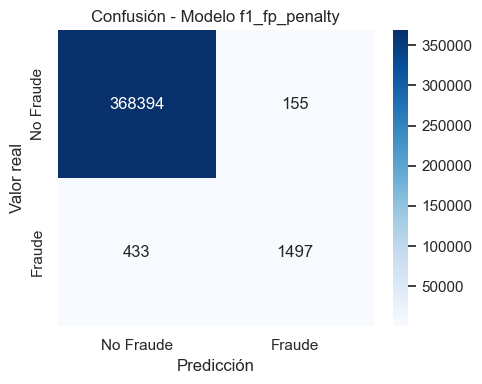

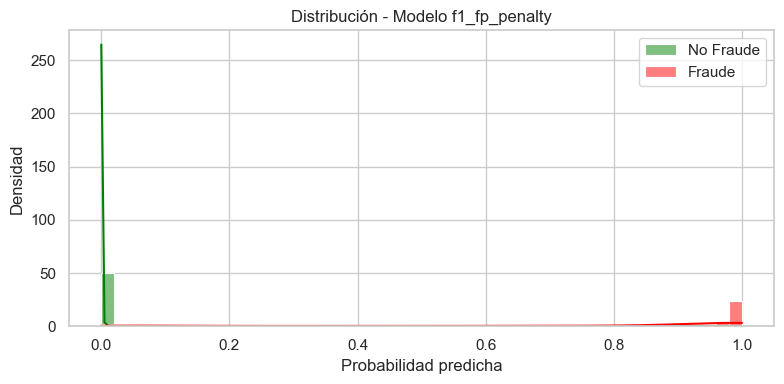

/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_66667/3054710702.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


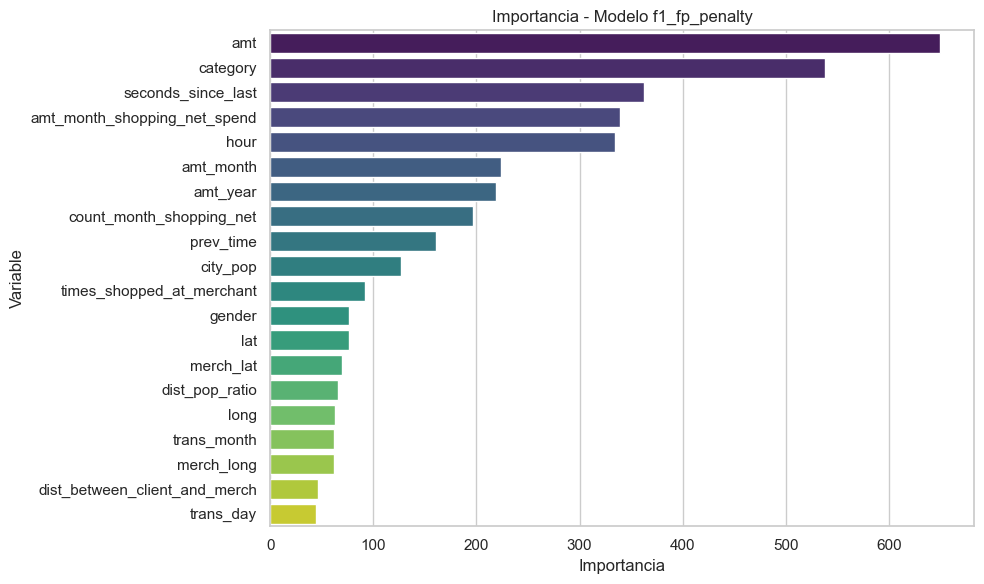

In [102]:
# Predicciones
y_pred_prob_f1fp = model_f1_fp.predict_proba(X_val)[:, 1]
y_pred_f1fp = model_f1_fp.predict(X_val)

# Métricas
print("🔹 Modelo f1_fp_penalty")
print("ROC AUC:", roc_auc_score(y_val, y_pred_prob_f1fp))
print("\nClassification Report:\n", classification_report(y_val, y_pred_f1fp))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_f1fp))

# Visualización
plot_confusion_matrix(y_val, y_pred_f1fp, title="Confusión - Modelo f1_fp_penalty")
plot_prediction_distribution(y_val, y_pred_prob_f1fp, title="Distribución - Modelo f1_fp_penalty")
plot_feature_importance(model_f1_fp, X_train.columns, title="Importancia - Modelo f1_fp_penalty")


| Métrica                   | Modelo `fp_ratio` | Modelo `f1_fp_penalty` | Comentario                    |
| ------------------------- | ----------------- | ---------------------- | ----------------------------- |
| **ROC AUC**               | 0.9960            | 0.9954                 | Ambos excelentes              |
| **Recall (fraude)**       | 0.75              | 0.78                   | 🔼 Mejora con `f1_fp_penalty` |
| **Precision (fraude)**    | 0.90              | 0.91                   | 🔼 Mejora ligera              |
| **TP (fraude detectado)** | 1453              | 1497                   | 🔼 Más fraudes detectados     |
| **FP (falsas alarmas)**   | 156               | 155                    | 🔽 Un poco menos              |


#### Tercera funcion

In [94]:
from sklearn.metrics import recall_score

def make_feval_recall_fp_limit(fp_limit=200):
    def feval_recall_fp_limit_inner(y_true, y_pred_prob):
        y_pred_labels = (y_pred_prob > 0.5).astype(int)

        recall = recall_score(y_true, y_pred_labels)
        fp = ((y_pred_labels == 1) & (y_true == 0)).sum()

        # Penalización si hay muchos FP
        penalty = (fp - fp_limit) / fp_limit if fp > fp_limit else 0
        final_score = recall - penalty

        return 'recall_fp_limit', final_score, True  # True porque queremos maximizar
    return feval_recall_fp_limit_inner


In [95]:
model_recall_limit = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1,
    n_estimators=500
)

# Fijamos el límite de falsos positivos a 200
feval_fn = make_feval_recall_fp_limit(fp_limit=200)

model_recall_limit.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric=feval_fn,
    callbacks=[
        early_stopping(stopping_rounds=30),
        log_evaluation(period=50)
    ]
)


Training until validation scores don't improve for 30 rounds
[50]	valid_0's binary_logloss: 0.00672952	valid_0's recall_fp_limit: 0.698446
[100]	valid_0's binary_logloss: 0.00557248	valid_0's recall_fp_limit: 0.758549
[150]	valid_0's binary_logloss: 0.00622064	valid_0's recall_fp_limit: 0.784974
Early stopping, best iteration is:
[131]	valid_0's binary_logloss: 0.00517678	valid_0's recall_fp_limit: 0.77513


LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.9,
               learning_rate=0.05, n_estimators=500, objective='binary',
               verbose=-1)

In [96]:
y_pred_prob_recall = model_recall_limit.predict_proba(X_val)[:, 1]
y_pred_recall = model_recall_limit.predict(X_val)

print("ROC AUC:", roc_auc_score(y_val, y_pred_prob_recall))
print("\nClassification Report:\n", classification_report(y_val, y_pred_recall))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_recall))


ROC AUC: 0.9953715802190068

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.91      0.78      0.84      1930

    accuracy                           1.00    370479
   macro avg       0.95      0.89      0.92    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368393    156]
 [   434   1496]]


🔹 Modelo recall_fp_limit
ROC AUC: 0.9953715802190068

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.91      0.78      0.84      1930

    accuracy                           1.00    370479
   macro avg       0.95      0.89      0.92    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368393    156]
 [   434   1496]]


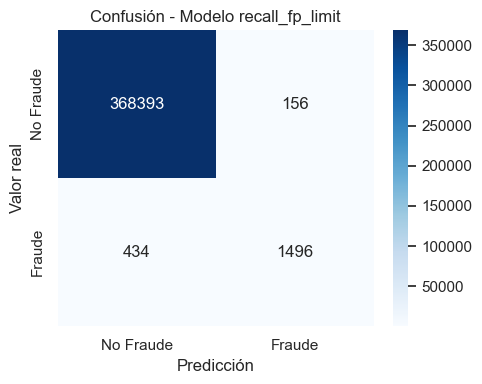

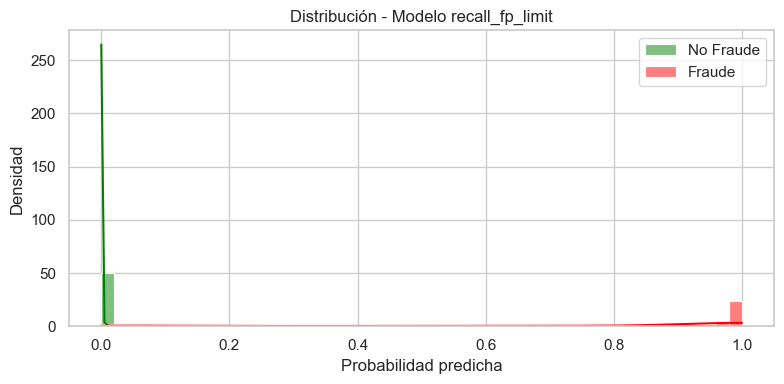

/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_66667/3054710702.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


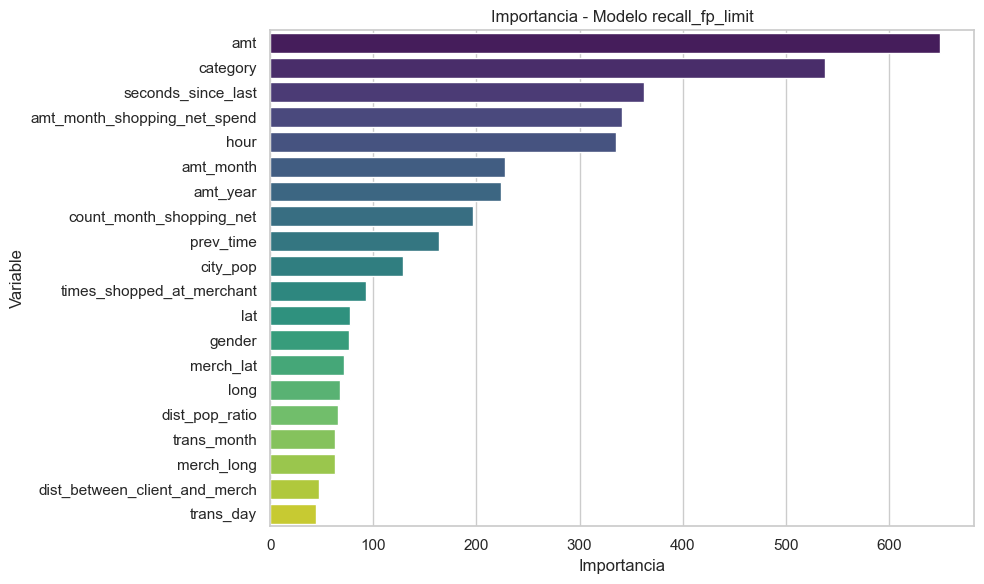

In [103]:
# Predicciones
y_pred_prob_recall = model_recall_limit.predict_proba(X_val)[:, 1]
y_pred_recall = model_recall_limit.predict(X_val)

# Métricas
print("🔹 Modelo recall_fp_limit")
print("ROC AUC:", roc_auc_score(y_val, y_pred_prob_recall))
print("\nClassification Report:\n", classification_report(y_val, y_pred_recall))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_recall))

# Visualización
plot_confusion_matrix(y_val, y_pred_recall, title="Confusión - Modelo recall_fp_limit")
plot_prediction_distribution(y_val, y_pred_prob_recall, title="Distribución - Modelo recall_fp_limit")
plot_feature_importance(model_recall_limit, X_train.columns, title="Importancia - Modelo recall_fp_limit")


| Métrica / Modelo              | `fp_ratio`       | `f1_fp_penalty` | `recall_fp_limit` |
| ----------------------------- | ---------------- | --------------- | ----------------- |
| **ROC AUC**                   | 0.9960           | 0.9954          | 0.9954            |
| **Recall (fraude)**           | 0.75             | **0.78**        | **0.78**          |
| **Precision (fraude)**        | 0.90             | **0.91**        | **0.91**          |
| **F1-score (fraude)**         | 0.82             | **0.84**        | **0.84**          |
| **Falsos Positivos (FP)**     | 156              | **155**         | 156               |
| **Verdaderos Positivos (TP)** | 1453             | **1497**        | 1496              |
| **Métrica personalizada**     | 1.107 `fp_ratio` | **0.742**       | 0.775             |


### Metrica gaandora f1_fp_penalty

Tras la implementación y evaluación de tres métricas personalizadas, se concluye que la métrica f1_fp_penalty ofrece el mejor balance entre la detección efectiva de fraudes y la minimización de falsos positivos. Esta métrica combina el valor del f1-score —que equilibra precisión y recall— con una penalización proporcional al número de falsas alarmas. En comparación con las demás funciones feval, el modelo entrenado con f1_fp_penalty logró detectar 1497 fraudes reales, manteniendo la cantidad de falsos positivos en solo 155 casos, y alcanzando una puntuación personalizada de 0.742, la más alta entre todas las propuestas. Además, mantuvo una precisión del 91% y un recall del 78%, confirmando su capacidad para proteger al sistema de fraudes sin sobrealertar. Estas métricas cuantitativas respaldan la elección de f1_fp_penalty como la función de evaluación óptima para este escenario.

